This notebook contains some exmple code to run principal component analysis on a set of data (I'll use two of the mass spectra data files as an example).

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
# Running this will prompt you to give permissions for the notebook to access your Google drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='mz_lime', ylabel='Lime1'>

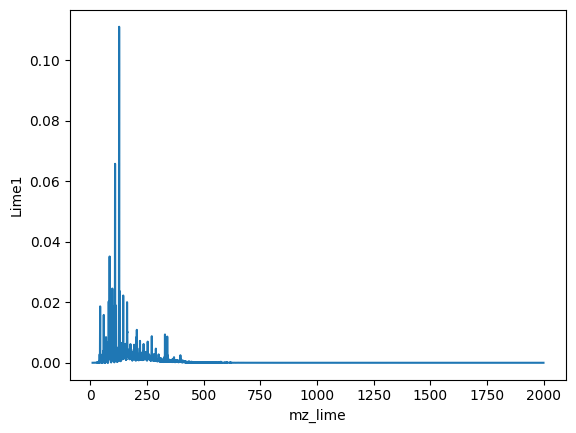

In [ ]:
# You can read in a .csv file from your Google Drive if you have run the previous cell (importing drive from google.colab) 
# and given permission for the notebook to access your Drive.
# Here, I'll read in one of the mass spec data files.
df_lime =pd.read_csv('drive/My Drive/data/MS/Lime_sample_1.csv')
# Here, I'm naming the columns of the .csv file that I've read into the dataframe names 'df_lime'
df_lime.columns=['mz_lime','Lime1','Lime2','Lime3','Lime4','Lime5']

# Read another file. In this example, one of the Lemon samples.
df_lemon =pd.read_csv('drive/My Drive/data/MS/Lemon_sample_1.csv')
df_lemon.columns=['mz_lemon','Lemon1','Lemon2','Lemon3','Lemon4','Lemon5']

#plot one of the spectra
sns.lineplot(data=df_lime,x='mz_lime', y='Lime1')

In [ ]:
# We can write the data to check what it looks like.
df_lime

,mz_lime,Lime1,Lime2,Lime3,Lime4,Lime5
0,9.900000,3.566247e-06,8.163455e-06,1.801872e-06,0.000009,4.561305e-06
1,9.950000,3.566247e-06,8.163455e-06,1.801872e-06,0.000009,4.561305e-06
2,10.000000,4.353816e-06,4.522634e-06,8.955635e-07,0.000007,2.648715e-06
3,10.050000,3.822895e-06,4.290223e-06,4.590969e-06,0.000007,2.151427e-06
4,10.100000,3.455640e-06,5.472827e-06,2.643489e-06,0.000007,6.301590e-07
...,...,...,...,...,...,...
39772,1998.500000,8.229950e-07,1.585012e-06,1.003453e-06,0.000002,0.000000e+00
39773,1998.550049,7.566306e-07,2.145112e-06,1.219228e-06,0.000001,1.063408e-06
39774,1998.599976,3.157003e-06,6.555599e-07,1.774903e-06,0.000002,2.473911e-06
39775,1998.650024,0.000000e+00,7.302742e-07,1.435006e-06,0.000003,0.000000e+00


In [ ]:
# and the second file that we read in.
df_lemon

,mz_lemon,Lemon1,Lemon2,Lemon3,Lemon4,Lemon5
0,9.900000,9.386688e-06,0.000005,1.040731e-05,0.000006,6.562673e-06
1,9.950000,9.386688e-06,0.000005,1.040731e-05,0.000006,6.562673e-06
2,10.000000,8.429838e-06,0.000007,1.272107e-05,0.000008,4.316771e-06
3,10.050000,9.633747e-06,0.000008,1.114547e-05,0.000007,5.319957e-06
4,10.100000,6.962591e-06,0.000005,9.929920e-06,0.000006,4.974654e-06
...,...,...,...,...,...,...
39772,1998.500000,2.071736e-06,0.000000,6.839992e-07,0.000002,1.208086e-06
39773,1998.550049,8.101359e-07,0.000002,1.259683e-06,0.000002,1.536073e-06
39774,1998.599976,1.508652e-06,0.000002,1.818310e-06,0.000005,2.321898e-06
39775,1998.650024,1.620275e-06,0.000004,6.478957e-07,0.000002,2.002568e-06


In [ ]:
# We can merge dataframes to get everything together in one place
df_merged = pd.concat([df_lime, df_lemon], axis=1)

# and print these to see what this looks like
df_merged

,mz_lime,Lime1,Lime2,Lime3,Lime4,Lime5,mz_lemon,Lemon1,Lemon2,Lemon3,Lemon4,Lemon5
0,9.900000,3.566247e-06,8.163455e-06,1.801872e-06,0.000009,4.561305e-06,9.900000,9.386688e-06,0.000005,1.040731e-05,0.000006,6.562673e-06
1,9.950000,3.566247e-06,8.163455e-06,1.801872e-06,0.000009,4.561305e-06,9.950000,9.386688e-06,0.000005,1.040731e-05,0.000006,6.562673e-06
2,10.000000,4.353816e-06,4.522634e-06,8.955635e-07,0.000007,2.648715e-06,10.000000,8.429838e-06,0.000007,1.272107e-05,0.000008,4.316771e-06
3,10.050000,3.822895e-06,4.290223e-06,4.590969e-06,0.000007,2.151427e-06,10.050000,9.633747e-06,0.000008,1.114547e-05,0.000007,5.319957e-06
4,10.100000,3.455640e-06,5.472827e-06,2.643489e-06,0.000007,6.301590e-07,10.100000,6.962591e-06,0.000005,9.929920e-06,0.000006,4.974654e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
39772,1998.500000,8.229950e-07,1.585012e-06,1.003453e-06,0.000002,0.000000e+00,1998.500000,2.071736e-06,0.000000,6.839992e-07,0.000002,1.208086e-06
39773,1998.550049,7.566306e-07,2.145112e-06,1.219228e-06,0.000001,1.063408e-06,1998.550049,8.101359e-07,0.000002,1.259683e-06,0.000002,1.536073e-06
39774,1998.599976,3.157003e-06,6.555599e-07,1.774903e-06,0.000002,2.473911e-06,1998.599976,1.508652e-06,0.000002,1.818310e-06,0.000005,2.321898e-06
39775,1998.650024,0.000000e+00,7.302742e-07,1.435006e-06,0.000003,0.000000e+00,1998.650024,1.620275e-06,0.000004,6.478957e-07,0.000002,2.002568e-06


In [ ]:
# I can remove the second mz column (mz_lemon) because it is the same as the first (mz_lime)
del df_merged['mz_lemon']

# Let's also delete the mz column
del df_merged['mz_lime']

df_merged

,Lime1,Lime2,Lime3,Lime4,Lime5,Lemon1,Lemon2,Lemon3,Lemon4,Lemon5
0,3.566247e-06,8.163455e-06,1.801872e-06,0.000009,4.561305e-06,9.386688e-06,0.000005,1.040731e-05,0.000006,6.562673e-06
1,3.566247e-06,8.163455e-06,1.801872e-06,0.000009,4.561305e-06,9.386688e-06,0.000005,1.040731e-05,0.000006,6.562673e-06
2,4.353816e-06,4.522634e-06,8.955635e-07,0.000007,2.648715e-06,8.429838e-06,0.000007,1.272107e-05,0.000008,4.316771e-06
3,3.822895e-06,4.290223e-06,4.590969e-06,0.000007,2.151427e-06,9.633747e-06,0.000008,1.114547e-05,0.000007,5.319957e-06
4,3.455640e-06,5.472827e-06,2.643489e-06,0.000007,6.301590e-07,6.962591e-06,0.000005,9.929920e-06,0.000006,4.974654e-06
...,...,...,...,...,...,...,...,...,...,...
39772,8.229950e-07,1.585012e-06,1.003453e-06,0.000002,0.000000e+00,2.071736e-06,0.000000,6.839992e-07,0.000002,1.208086e-06
39773,7.566306e-07,2.145112e-06,1.219228e-06,0.000001,1.063408e-06,8.101359e-07,0.000002,1.259683e-06,0.000002,1.536073e-06
39774,3.157003e-06,6.555599e-07,1.774903e-06,0.000002,2.473911e-06,1.508652e-06,0.000002,1.818310e-06,0.000005,2.321898e-06
39775,0.000000e+00,7.302742e-07,1.435006e-06,0.000003,0.000000e+00,1.620275e-06,0.000004,6.478957e-07,0.000002,2.002568e-06


Now that we have some data read in, we can call some routines in scikit-learn.
Here, we will use PCA. The documentation and examples can be found here: 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
# Something that you might want to do is normalise the data. 
# Although the spectra have been collected using a consistent method, the intensity in spectra can be arbitrarily scaled due to amount of sample, etc.
# A simple way to normalise the data would be to find the maximum intensity in each spectrum (each column of the data) and divide by that value.

# Pandas has a function for finding the maximum value in a column of data. The max() function.
# For example, to find the maximum in the first lime mass spectrum:
maxvalue = df_merged.max()

# We can inspect these by printing the array of maximum values 
# (they don't actually vary much, so normalisation might not be required)
maxvalue

Lime1     0.111081
Lime2     0.123505
Lime3     0.100771
Lime4     0.103693
Lime5     0.097189
Lemon1    0.104235
Lemon2    0.096845
Lemon3    0.113060
Lemon4    0.122656
Lemon5    0.117282
dtype: float64

In [ ]:
# Now divide entries in the dataframe by the corresponding maximum value
df_normalised = df_merged.div(maxvalue)

# and write this out to look at the result.
df_normalised

,Lime1,Lime2,Lime3,Lime4,Lime5,Lemon1,Lemon2,Lemon3,Lemon4,Lemon5
0,0.000032,0.000066,0.000018,0.000086,0.000047,0.000090,0.000050,0.000092,0.000051,0.000056
1,0.000032,0.000066,0.000018,0.000086,0.000047,0.000090,0.000050,0.000092,0.000051,0.000056
2,0.000039,0.000037,0.000009,0.000064,0.000027,0.000081,0.000072,0.000113,0.000064,0.000037
3,0.000034,0.000035,0.000046,0.000067,0.000022,0.000092,0.000086,0.000099,0.000054,0.000045
4,0.000031,0.000044,0.000026,0.000070,0.000006,0.000067,0.000047,0.000088,0.000051,0.000042
...,...,...,...,...,...,...,...,...,...,...
39772,0.000007,0.000013,0.000010,0.000017,0.000000,0.000020,0.000000,0.000006,0.000019,0.000010
39773,0.000007,0.000017,0.000012,0.000012,0.000011,0.000008,0.000021,0.000011,0.000019,0.000013
39774,0.000028,0.000005,0.000018,0.000015,0.000025,0.000014,0.000018,0.000016,0.000041,0.000020
39775,0.000000,0.000006,0.000014,0.000033,0.000000,0.000016,0.000043,0.000006,0.000020,0.000017


One thing to note is that scikit-learn expects observations to be in rows, ie. each row should be a spectrum, not each column.  See https://www.tutorialspoint.com/scikit_learn/scikit_learn_data_representation.htm

There is a function to transpose a dataframe. Transposing swaps rows for columns.

In [ ]:
# transform the normalised data so that observations (spectra) are organised in rows, not columns. 
df_normalised_transposed = df_normalised.transpose()

# and print this to check
df_normalised_transposed

,0,1,2,3,4,5,6,7,8,9,...,39767,39768,39769,39770,39771,39772,39773,39774,39775,39776
Lime1,0.000032,0.000032,0.000039,0.000034,0.000031,0.000031,0.000033,0.000033,0.000033,0.000034,...,0.000015,0.000015,0.000016,0.000015,0.000014,0.000007,0.000007,0.000028,0.000000,0.000000
Lime2,0.000066,0.000066,0.000037,0.000035,0.000044,0.000016,0.000037,0.000038,0.000039,0.000041,...,0.000011,0.000013,0.000013,0.000012,0.000018,0.000013,0.000017,0.000005,0.000006,0.000013
Lime3,0.000018,0.000018,0.000009,0.000046,0.000026,0.000077,0.000043,0.000044,0.000044,0.000043,...,0.000012,0.000013,0.000013,0.000013,0.000006,0.000010,0.000012,0.000018,0.000014,0.000021
Lime4,0.000086,0.000086,0.000064,0.000067,0.000070,0.000059,0.000071,0.000073,0.000074,0.000075,...,0.000019,0.000017,0.000016,0.000015,0.000008,0.000017,0.000012,0.000015,0.000033,0.000024
Lime5,0.000047,0.000047,0.000027,0.000022,0.000006,0.000022,0.000024,0.000025,0.000026,0.000028,...,0.000009,0.000009,0.000009,0.000009,0.000010,0.000000,0.000011,0.000025,0.000000,0.000005
Lemon1,0.000090,0.000090,0.000081,0.000092,0.000067,0.000075,0.000076,0.000075,0.000075,0.000075,...,0.000015,0.000014,0.000014,0.000014,0.000009,0.000020,0.000008,0.000014,0.000016,0.000016
Lemon2,0.000050,0.000050,0.000072,0.000086,0.000047,0.000087,0.000071,0.000071,0.000068,0.000064,...,0.000021,0.000020,0.000020,0.000018,0.000014,0.000000,0.000021,0.000018,0.000043,0.000020
Lemon3,0.000092,0.000092,0.000113,0.000099,0.000088,0.000076,0.000082,0.000080,0.000078,0.000076,...,0.000012,0.000012,0.000012,0.000011,0.000015,0.000006,0.000011,0.000016,0.000006,0.000009
Lemon4,0.000051,0.000051,0.000064,0.000054,0.000051,0.000035,0.000050,0.000050,0.000049,0.000049,...,0.000014,0.000015,0.000017,0.000018,0.000005,0.000019,0.000019,0.000041,0.000020,0.000010
Lemon5,0.000056,0.000056,0.000037,0.000045,0.000042,0.000028,0.000039,0.000039,0.000038,0.000039,...,0.000013,0.000014,0.000015,0.000015,0.000015,0.000010,0.000013,0.000020,0.000017,0.000006


In [34]:
# Scikit-learn has functions to perform PCA. 
#Apply nornal (linear) PCA to data. Here, I will specify the number of principal components that I want. Here, I ask for 5. 
# I could leave this blank and it will give me all of the components.
# I can give this a name (here, I call it pca_10 so that I remember that I've asked for 5 components).
pca_5 = PCA(n_components=5)
pca_5.fit(df_normalised_transposed)

# See the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# You can get the explained variance as a fraction of the total variance with explained_variance_ratio_
pca_5.explained_variance_ratio_

array([0.70125436, 0.13609641, 0.07427815, 0.0384031 , 0.02345436])

So, the first principal component captures 0.701 (70.1%) of the total variance for this small subset of the data.

In [35]:
# I can sum them to check the total variance explained by the 5 principal components that I've asked for
sum(pca_5.explained_variance_ratio_)

0.9734863920323641

In [36]:
# You can use numpy to do things like calculating the cumulative sum
# This will show how many components get you to a target value for the explained variance
np.cumsum(pca_5.explained_variance_ratio_)

array([0.70125436, 0.83735077, 0.91162893, 0.95003203, 0.97348639])

In [37]:
df_components = pd.DataFrame(pca_5.components_)
df_components

,0,1,2,3,4,5,6,7,8,9,...,39767,39768,39769,39770,39771,39772,39773,39774,39775,39776
0,0.000006,0.000006,0.000018,0.000019,0.000011,0.000011,0.000011,0.000010,0.000009,0.000007,...,0.000001,1.238352e-06,0.000002,0.000002,8.959552e-07,2.256953e-08,1.965867e-06,0.000001,0.000007,-2.478579e-07
1,-0.000004,-0.000004,0.000002,0.000020,-0.000013,0.000044,0.000013,0.000014,0.000013,0.000011,...,0.000002,-2.366054e-07,-0.000001,-0.000001,-3.271048e-06,-9.251390e-06,-9.287438e-07,-0.000005,0.000011,9.305750e-06
2,-0.000039,-0.000039,-0.000058,-0.000040,-0.000037,-0.000021,-0.000032,-0.000031,-0.000030,-0.000031,...,-0.000004,-2.361469e-06,-0.000002,-0.000002,1.657940e-06,-5.740764e-06,1.135110e-05,-0.000006,0.000003,5.187538e-06
3,-0.000050,-0.000050,-0.000037,-0.000025,-0.000030,-0.000002,-0.000014,-0.000012,-0.000013,-0.000016,...,0.000013,9.791731e-06,0.000010,0.000007,3.682640e-06,-1.301760e-05,6.877218e-06,0.000006,0.000039,3.170407e-06
4,0.000006,0.000006,-0.000037,-0.000063,-0.000040,-0.000080,-0.000049,-0.000049,-0.000046,-0.000041,...,-0.000011,-9.975919e-06,-0.000009,-0.000007,-6.199852e-07,-1.053388e-05,-6.668004e-06,0.000016,-0.000023,-2.303096e-05


In [38]:
# I'll transpose the dataframe of principal components
df_components_transposed = df_components.transpose()

# add back in a column of the mz values if I want them
df_components_transposed['mz'] = df_lime['mz_lime']

# and rename the columns
df_components_transposed.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'mz']
df_components_transposed

,PC1,PC2,PC3,PC4,PC5,mz
0,6.445378e-06,-3.603230e-06,-0.000039,-0.000050,0.000006,4.561305e-06
1,6.445378e-06,-3.603230e-06,-0.000039,-0.000050,0.000006,4.561305e-06
2,1.839713e-05,1.581068e-06,-0.000058,-0.000037,-0.000037,2.648715e-06
3,1.893498e-05,2.006725e-05,-0.000040,-0.000025,-0.000063,2.151427e-06
4,1.052947e-05,-1.272847e-05,-0.000037,-0.000030,-0.000040,6.301590e-07
...,...,...,...,...,...,...
39772,2.256953e-08,-9.251390e-06,-0.000006,-0.000013,-0.000011,0.000000e+00
39773,1.965867e-06,-9.287438e-07,0.000011,0.000007,-0.000007,1.063408e-06
39774,1.424945e-06,-5.240575e-06,-0.000006,0.000006,0.000016,2.473911e-06
39775,6.998348e-06,1.092213e-05,0.000003,0.000039,-0.000023,0.000000e+00


In [40]:
# We can now call the pca_5 function that we set up using .transform to project the original data (spectra)
# onto the principal components. This gives reduced dimensionality representations of the data.
MS_pca = pca_5.transform(df_normalised_transposed)

# We'll write out the resulting array. The projected spectra are in each row of MS_pca.
# You can see that the first principal component distinguishes the first 5 spectra from the next 5.
MS_pca

array([[-0.70313668, -0.34186637, -0.38518774,  0.19675133, -0.07292365],
       [-0.65309682, -0.41190995,  0.3887477 , -0.09565691, -0.13939237],
       [-0.60537211,  0.29446651,  0.31818228, -0.05632813, -0.09850595],
       [-0.99208204,  0.02058483, -0.23190079,  0.17873738,  0.04205654],
       [-0.82463073,  0.4813552 ,  0.09023908, -0.08064894,  0.25602348],
       [ 0.59681555,  0.26132671, -0.35908212, -0.27336649, -0.10070633],
       [ 1.0933622 ,  0.4798122 ,  0.12503094,  0.3160633 , -0.14980775],
       [ 0.4879455 , -0.03180199, -0.14899068, -0.23031399,  0.01867769],
       [ 0.55507241, -0.42255109,  0.08529787, -0.07297837, -0.02055458],
       [ 1.04512271, -0.32941605,  0.11766347,  0.11774081,  0.26513292]])

<Axes: >

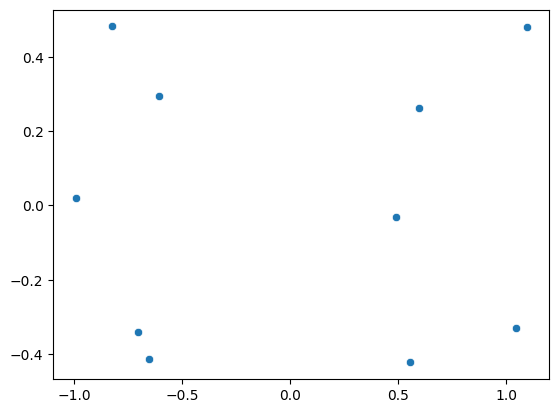

In [45]:
# We can look at this in a scatterplot ([:,0] picks the first column, [:,1] picks the second column)
sns.scatterplot(x=MS_pca[:, 0], y=MS_pca[:, 1])